In [4]:
# DELETE BEFORE PUBLISHING Need to be editted by Supratim
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Exploring the Pedestrian Traffic Data and Developmental Activity Footprint to Map and Predict Graffiti Vandalism and Waste Dumping Hotspots across the City of Melbourne</div>

<div class="usecase-authors"><b>Authored by: </b> Supratim Dobhal</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, Data Wrangling, Exploratory Data Analysis, Geospatial Analysis, Time Series Analysis, Clustering, Predictive Modelling, Machine Learning}</div>
</div>

<div class="usecase-section-header">Scenario</div>

In the city of Melbourne, the people dwelling here and the local authorities have observed that there have been increasing cases of graffiti vandalism and illegal waste dumping by the day. Such activities affect the people living around as they not only cause severe deterioration in the aesthetic appeal of the place, but also incur significant amount of resources to clean and repair by the governmental authorities.
The city wants to deal with this issue by proactively identifying, monitoring and maintaining areas that are susceptible to such activities. The goal is to use the historical data on such incidents, pedestrian traffic data, and developmental footprint combined with socio economical factors, temporal factors and geospatial information to develop a system which can map existing graffiti vandalism and illegal waste dumping hotspots while also predicting future areas where this could happen.

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- Learn how to Load Data using APIs
- Understanding how to interpret, clean, prepare and process data.
- Integrating Data from Multiple Sources
- Performing Exploratory Data Analysis
- Data Driven Decision Making 
- Visualizing, Mapping and Analysing Geospatial Information
- Building a Prediction Model
- Recommending Cost Effective and Strategic Solutions to Optimize Resource Allocation 


<div class="usecase-section-header">Introduction and Background</div>

Graffiti Vandalism and illegal waste dumping are two of the key pain points that affect the quality of living for the residents and for the people who visit the city. They also lead to allocation of hefty amounts of resources by the local authorities. Conventionally, the local authorities have addressing this issue on a very ad-hoc bases, dealing with complaints as and when they arrive and get reported by someone. However, this approach is not the most efficient, as it fails to take account of the factors causing this problem and is unable to predict future problem areas or recommend preventive solutions.

The best approach to tackle this challenge would be to come up with a solution with the help of data driven predictive analysis, where we ca use historical data such as pedestrian traffic activity, geospatial information, temporal activity, developmental footprint and public complaints to forecast or predict where these activities are most likely to happen. By analysing these factors, concerned authorities will be able to allocate their resources efficiently wherever and whenever required. It will also give them the ability to take preventive measures to eradicate this problem.

For this use case, we will use techniques such as geospatial analysis, time series analysis, identification of correlations, data wrangling and machine learning techniques to identify, map and predict graffiti and waste dumping hotspots. We will also be including introducing other analytical, visualization and predictive tools to enhance this use case.



In [14]:
!pip install folium
!pip install geopandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import os
os.environ['OMP_NUM_THREADS'] = '1'
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
from shapely.geometry import Point
import requests
from io import StringIO

### Defining a Function to download data through API

In [16]:
def API_Unlimited(datasetname): # pass in dataset name and api key
    dataset_id = datasetname

    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = api_key
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC'
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        datasetname = pd.read_csv(StringIO(url_content), delimiter=';')
        print(datasetname.sample(10, random_state=999)) # Test
        return datasetname 
    else:
        return (print(f'Request failed with status code {response.status_code}'))


### Downloading the Required Datasets from City of Melbourne Open Data Website

In [18]:
download_link_1 = 'pedestrian-counting-system-sensor-locations'
download_link_2 = 'pedestrian-counting-system-past-hour-counts-per-minute'
download_link_3 = 'customer-service-requests-with-resolution-time'
download_link_4 = 'development-activity-model-footprints'


# Use functions to download and load data
Pedestrian_SensorLoc = API_Unlimited(download_link_1)
Pedestrian_CountsPerMinute = API_Unlimited(download_link_2)
Reports_ServiceRequest = API_Unlimited(download_link_3)
Development_Activity_Footprint = API_Unlimited(download_link_4)

     location_id                                 sensor_description  \
61            65                          Swanston St - City Square   
93            17                              Collins Place (South)   
29            87                                    Errol St (West)   
126          137     COM Pole 2353 - Towards the city, NAB Building   
0              2                         Bourke Street Mall (South)   
24            72                                  Flinders St- ACMI   
18            43                       Monash Rd-Swanston St (West)   
125          131  I-Hub Corner of King Street and Flinders Stree...   
53            41                     Flinders La-Swanston St (West)   
140          166                                 484 Spencer Street   

      sensor_name installation_date  \
61        SwaCs_T        2020-03-12   
93        Col15_T        2009-03-30   
29      Errol23_T        2022-05-20   
126  BouHbr2353_T        2023-11-03   
0        Bou283_T      

### Inspecting the information in the Datasets for further Preparation

#### First Dataset - Pedestrian Counting System Sensor Locations

In [46]:
# Display the first few rows of each dataset
print("Dataset 1 - Pedestrian Counting System Sensor Locations:\n\n")
Pedestrian_SensorLoc.head()

Dataset 1 - Pedestrian Counting System Sensor Locations:




,location_id,sensor_description,sensor_name,installation_date,note,location_type,status,direction_1,direction_2,latitude,longitude,location
0,2,Bourke Street Mall (South),Bou283_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813807,144.965167,"-37.81380668, 144.96516718"
1,4,Town Hall (West),Swa123_T,2009-03-23,NaN,Outdoor,A,North,South,-37.814880,144.966088,"-37.81487988, 144.9660878"
2,6,Flinders Street Station Underpass,FliS_T,2009-03-25,Upgraded on 8/09/21,Outdoor,A,North,South,-37.819117,144.965583,"-37.81911705, 144.96558255"
3,8,Webb Bridge,WebBN_T,2009-03-24,NaN,Outdoor,A,North,South,-37.822935,144.947175,"-37.82293543, 144.9471751"
4,10,Victoria Point,BouHbr_T,2009-04-23,NaN,Outdoor,A,East,West,-37.818765,144.947105,"-37.81876474, 144.94710545"


#### Second Dataset - Pedestrian Counting System Counts Per Minute

In [48]:
print("\nDataset 2 - Pedestrian Counting System Counts Per Minute:\n\n")
Pedestrian_CountsPerMinute.head()


Dataset 2 - Pedestrian Counting System Counts Per Minute:




,location_id,sensing_datetime,sensing_date,sensing_time,direction_1,direction_2,total_of_directions
0,3,2024-11-21T14:10:00+00:00,2024-11-22,01:10,0,1,1
1,3,2024-11-21T14:17:00+00:00,2024-11-22,01:17,3,1,4
2,3,2024-11-21T14:23:00+00:00,2024-11-22,01:23,1,4,5
3,3,2024-11-21T14:24:00+00:00,2024-11-22,01:24,1,1,2
4,4,2024-11-21T14:12:00+00:00,2024-11-22,01:12,4,1,5


#### Third Dataset - Reportings for Removal of Graffiti and Waste Dumping Service Request

In [50]:
print("\nDataset 3 - Reportings for Removal of Graffiti and Waste Dumping Service Request:\n\n")
Reports_ServiceRequest.head()


Dataset 3 - Reportings for Removal of Graffiti and Waste Dumping Service Request:




,request_status,date_received,date_completed,suburb,category,service_desc,days_to_complete
0,CLOSED,2016-05-05,2016-05-12,Carlton,Graffiti,Graffiti Removal,7
1,CLOSED,2014-11-20,2014-11-21,East Melbourne,"Waste, Street Cleaning and Litter",Missed Bin Collection,1
2,CLOSED,2014-11-27,2014-12-01,Carlton,"Waste, Street Cleaning and Litter",Missed Bin Collection,4
3,CLOSED,2015-01-21,2015-01-22,Melbourne,"Waste, Street Cleaning and Litter",Street Cleaning services,1
4,CLOSED,2015-01-23,2015-01-27,Southbank,"Waste, Street Cleaning and Litter",Damaged Bins,4


#### Fourth Dataset - Developmental Activity Model Footprint

In [52]:
print("\nDataset 4 - Developmental Activity Model Footprint:")
Development_Activity_Footprint.head()


Dataset 4 - Developmental Activity Model Footprint:


,dev_key,status,permit_num,bldhgt_ahd,base_ahd,address,num_floors,land_use_1,land_use_2,land_use_3,shape_type,datadate,json_geometry,geo_point_2d
0,X000931,COMPLETED,TPM-2013-4,321.0,2.3,68-82 Southbank Boulevard SOUTHBANK VIC 3006,99,Dwellings 1060,Car parks 600,Retail (sq.m) 659,tower,2024-10-24T12:53:51+00:00,"{""coordinates"": [[[144.9637806979, -37.8230519...","-37.82315946744557, 144.96395988531373"
1,X001215,COMPLETED,TPM-2010-31,31.6,1.9,312-320 City Road SOUTHBANK VIC 3006,43,Dwellings 494,Car parks 180,Retail (sq.m) 276,podium,2024-10-24T12:53:51+00:00,"{""coordinates"": [[[144.9584968027, -37.8271049...","-37.827113426654456, 144.95822445674378"
2,X000930,COMPLETED,TPM-2014-42,30.9,1.3,54-68 Kavagh Street SOUTHBANK VIC 3006,51,Dwellings 597,Car parks 417,Retail (sq.m) 557,podium,2024-10-24T12:53:51+00:00,"{""coordinates"": [[[144.9637079271, -37.8244040...","-37.82409175282328, 144.9637290411646"
3,X000930,COMPLETED,TPM-2014-42,157.8,1.3,54-68 Kavagh Street SOUTHBANK VIC 3006,51,Dwellings 597,Car parks 417,Retail (sq.m) 557,tower,2024-10-24T12:53:51+00:00,"{""coordinates"": [[[144.9637079271, -37.8244040...","-37.82416188970118, 144.9637093351437"
4,X000755,COMPLETED,TPM-2014-33,21.6,3.0,68-70 Dorcas Street SOUTHBANK VIC 3006,28,Dwellings 238,Car parks 193,Retail (sq.m) 240,podium,2024-10-24T12:53:51+00:00,"{""coordinates"": [[[144.9675327506, -37.8303791...","-37.83063263010421, 144.9674665959633"


### Dataset Summary and Statistics

In [59]:
# Display basic information about the laneway dataset
print("Pedestrian Counting System Sensor Locations Dataset Information:\n\n")
Pedestrian_SensorLoc.info()

Pedestrian Counting System Sensor Locations Dataset Information:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location_id         141 non-null    int64  
 1   sensor_description  139 non-null    object 
 2   sensor_name         141 non-null    object 
 3   installation_date   139 non-null    object 
 4   note                33 non-null     object 
 5   location_type       141 non-null    object 
 6   status              141 non-null    object 
 7   direction_1         109 non-null    object 
 8   direction_2         109 non-null    object 
 9   latitude            141 non-null    float64
 10  longitude           141 non-null    float64
 11  location            141 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 13.3+ KB


In [130]:
# Display basic information about the laneway dataset
print("Pedestrian Counts Per Minute Dataset Information:\n\n")
print(Pedestrian_CountsPerMinute.info())

Pedestrian Counts Per Minute Dataset Information:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38443 entries, 0 to 38442
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   location_id          38443 non-null  int64              
 1   sensing_date         38443 non-null  object             
 2   sensing_time         38443 non-null  object             
 3   direction_1          38443 non-null  int64              
 4   direction_2          38443 non-null  int64              
 5   total_of_directions  38443 non-null  int64              
 6   Sensing_Datetime     38443 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 2.1+ MB
None


In [136]:
# Display basic information about the laneway dataset
print("Service Request - Removal of Graffiti and Waste Dumping Dataset Info:\n\n")
print(Reports_ServiceRequest.info())

Service Request - Removal of Graffiti and Waste Dumping Dataset Info:


<class 'pandas.core.frame.DataFrame'>
Index: 9174 entries, 0 to 46454
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   request_status    9174 non-null   object        
 1   date_received     9174 non-null   object        
 2   date_completed    9073 non-null   object        
 3   suburb            5596 non-null   object        
 4   category          9174 non-null   object        
 5   service_desc      9174 non-null   object        
 6   days_to_complete  9174 non-null   int64         
 7   Date_Received     9174 non-null   datetime64[ns]
 8   Date_Completed    9073 non-null   datetime64[ns]
 9   Days_to_Complete  9073 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 788.4+ KB
None


In [140]:
# Display basic information about the laneway dataset
print("Development Activity Model Footprint Dataset Info:\n\n")
print(Development_Activity_Footprint.info())

Development Activity Model Footprint Dataset Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dev_key     1274 non-null   object 
 1   status      1274 non-null   object 
 2   permit_num  1274 non-null   object 
 3   bldhgt_ahd  1274 non-null   float64
 4   base_ahd    1274 non-null   float64
 5   address     1274 non-null   object 
 6   num_floors  1274 non-null   int64  
 7   land_use_1  1260 non-null   object 
 8   land_use_2  1160 non-null   object 
 9   land_use_3  988 non-null    object 
 10  shape_type  1274 non-null   object 
 11  datadate    1274 non-null   object 
 12  Latitude    1274 non-null   float64
 13  Longitude   1274 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 139.5+ KB
None


### Data Preparation and Cleaning

#### Sensor Location Dataset

In [81]:
# Convert latitude and longitude to numeric
Pedestrian_SensorLoc['Latitude'] = pd.to_numeric(Pedestrian_SensorLoc['latitude'], errors='coerce')
Pedestrian_SensorLoc['Longitude'] = pd.to_numeric(Pedestrian_SensorLoc['longitude'], errors='coerce')

# Drop irrelevant columns
Pedestrian_SensorLoc = Pedestrian_SensorLoc.drop(columns=['location', 'note', 'latitude', 'longitude'])

In [83]:
Pedestrian_SensorLoc

,location_id,sensor_description,sensor_name,installation_date,location_type,status,direction_1,direction_2,Latitude,Longitude
0,2,Bourke Street Mall (South),Bou283_T,2009-03-30,Outdoor,A,East,West,-37.813807,144.965167
1,4,Town Hall (West),Swa123_T,2009-03-23,Outdoor,A,North,South,-37.814880,144.966088
2,6,Flinders Street Station Underpass,FliS_T,2009-03-25,Outdoor,A,North,South,-37.819117,144.965583
3,8,Webb Bridge,WebBN_T,2009-03-24,Outdoor,A,North,South,-37.822935,144.947175
4,10,Victoria Point,BouHbr_T,2009-04-23,Outdoor,A,East,West,-37.818765,144.947105
...,...,...,...,...,...,...,...,...,...,...
136,161,Birrarung Marr - COM - Pole 1109,BirArt1109_T,2024-06-04,Outdoor,A,East,West,-37.818513,144.971313
137,164,I-Hub 526 La Trobe Street,Lat526_T,2024-08-14,Outdoor,A,East,North,-37.813005,144.951604
138,164,I-Hub 526 La Trobe Street,Lat526_T,2024-08-14,Outdoor,A,East,South,-37.813005,144.951604
139,164,I-Hub 526 La Trobe Street,Lat526_T,2024-08-14,Outdoor,A,North,East,-37.813005,144.951604


##### Checking for Duplicates

In [85]:
# Check for duplicate location_id entries
duplicate_locations = Pedestrian_SensorLoc[Pedestrian_SensorLoc.duplicated(subset=['location_id'], keep=False)]

if not duplicate_locations.empty:
    print("Duplicate location entries found:")
    print(duplicate_locations)
else:
    print("No duplicate location entries found.")

Duplicate location entries found:
     location_id         sensor_description sensor_name installation_date  \
7             18      Collins Place (North)     Col12_T        2009-03-30   
8             18      Collins Place (North)     Col12_T        2009-03-30   
16            39               Alfred Place     AlfPl_T        2019-12-04   
17            39               Alfred Place     AlfPl_T        2019-12-04   
48           164  I-Hub 526 La Trobe Street    Lat526_T        2024-08-14   
49           164  I-Hub 526 La Trobe Street    Lat526_T        2024-08-14   
84           164  I-Hub 526 La Trobe Street    Lat526_T        2024-08-14   
87             3          Melbourne Central    Swa295_T        2009-03-25   
88             3          Melbourne Central    Swa295_T        2009-03-25   
89             3          Melbourne Central    Swa295_T        2009-03-25   
94            18      Collins Place (North)     Col12_T        2009-03-30   
99            39               Alfred Plac

#### Pedestrian Counts Per Minute Dataset

In [89]:
# Convert sensing_datetime to datetime
Pedestrian_CountsPerMinute['Sensing_Datetime'] = pd.to_datetime(Pedestrian_CountsPerMinute['sensing_datetime'])

# Drop duplicates
Pedestrian_CountsPerMinute = Pedestrian_CountsPerMinute.drop_duplicates()

# Check for invalid entries
Pedestrian_CountsPerMinute = Pedestrian_CountsPerMinute.dropna(subset=['location_id', 'total_of_directions'])
# Drop irrelevant columns
Pedestrian_CountsPerMinute = Pedestrian_CountsPerMinute.drop(columns=['sensing_datetime'])


In [91]:
Pedestrian_CountsPerMinute

,location_id,sensing_date,sensing_time,direction_1,direction_2,total_of_directions,Sensing_Datetime
0,3,2024-11-22,01:10,0,1,1,2024-11-21 14:10:00+00:00
1,3,2024-11-22,01:17,3,1,4,2024-11-21 14:17:00+00:00
2,3,2024-11-22,01:23,1,4,5,2024-11-21 14:23:00+00:00
3,3,2024-11-22,01:24,1,1,2,2024-11-21 14:24:00+00:00
4,4,2024-11-22,01:12,4,1,5,2024-11-21 14:12:00+00:00
...,...,...,...,...,...,...,...
38438,161,2024-11-22,15:20,3,2,5,2024-11-22 04:20:00+00:00
38439,164,2024-11-22,15:05,19,1,20,2024-11-22 04:05:00+00:00
38440,164,2024-11-22,15:10,24,11,35,2024-11-22 04:10:00+00:00
38441,164,2024-11-22,15:35,6,3,9,2024-11-22 04:35:00+00:00


#### Service Requests Dataset

In [101]:
# Filter for graffiti-related requests
Reports_ServiceRequest = Reports_ServiceRequest[Reports_ServiceRequest['category'].str.contains("Graffiti", na=False)]

# Convert dates to datetime
Reports_ServiceRequest['Date_Received'] = pd.to_datetime(Reports_ServiceRequest['date_received'])
Reports_ServiceRequest['Date_Completed'] = pd.to_datetime(Reports_ServiceRequest['date_completed'])

# Calculate time to resolve
Reports_ServiceRequest['Days_to_Complete'] = (Reports_ServiceRequest['Date_Completed'] - Reports_ServiceRequest['Date_Received']).dt.days


In [103]:
Reports_ServiceRequest

,request_status,date_received,date_completed,suburb,category,service_desc,days_to_complete,Date_Received,Date_Completed,Days_to_Complete
0,CLOSED,2016-05-05,2016-05-12,Carlton,Graffiti,Graffiti Removal,7,2016-05-05,2016-05-12,7.0
5,CLOSED,2014-12-01,2014-12-08,Carlton,Graffiti,Graffiti Removal,7,2014-12-01,2014-12-08,7.0
9,CLOSED,2014-12-06,2014-12-15,Parkville,Graffiti,Graffiti Removal,9,2014-12-06,2014-12-15,9.0
10,CLOSED,2014-12-11,2015-01-22,Melbourne,Graffiti,Graffiti Removal,42,2014-12-11,2015-01-22,42.0
12,CLOSED,2014-12-17,2015-01-08,Melbourne,Graffiti,Graffiti Removal,22,2014-12-17,2015-01-08,22.0
...,...,...,...,...,...,...,...,...,...,...
46428,CLOSED,2015-09-28,2015-10-13,NaN,Graffiti,Graffiti Removal,15,2015-09-28,2015-10-13,15.0
46434,CLOSED,2016-04-29,2016-05-10,NaN,Graffiti,Graffiti Removal,11,2016-04-29,2016-05-10,11.0
46436,CLOSED,2015-11-09,2015-11-19,NaN,Graffiti,Graffiti Removal,10,2015-11-09,2015-11-19,10.0
46441,CLOSED,2016-01-04,2016-02-19,Carlton,Graffiti,Graffiti Removal,46,2016-01-04,2016-02-19,46.0


#### Developmental Activity Footprint Dataset

In [107]:
# Extract coordinates
Development_Activity_Footprint[['Latitude', 'Longitude']] = Development_Activity_Footprint['geo_point_2d'].str.split(',', expand=True).astype(float)

# Drop irrelevant columns
Development_Activity_Footprint = Development_Activity_Footprint.drop(columns=['json_geometry', 'geo_point_2d'])


In [109]:
Development_Activity_Footprint

,dev_key,status,permit_num,bldhgt_ahd,base_ahd,address,num_floors,land_use_1,land_use_2,land_use_3,shape_type,datadate,Latitude,Longitude
0,X000931,COMPLETED,TPM-2013-4,321.0,2.3,68-82 Southbank Boulevard SOUTHBANK VIC 3006,99,Dwellings 1060,Car parks 600,Retail (sq.m) 659,tower,2024-10-24T12:53:51+00:00,-37.823159,144.963960
1,X001215,COMPLETED,TPM-2010-31,31.6,1.9,312-320 City Road SOUTHBANK VIC 3006,43,Dwellings 494,Car parks 180,Retail (sq.m) 276,podium,2024-10-24T12:53:51+00:00,-37.827113,144.958224
2,X000930,COMPLETED,TPM-2014-42,30.9,1.3,54-68 Kavagh Street SOUTHBANK VIC 3006,51,Dwellings 597,Car parks 417,Retail (sq.m) 557,podium,2024-10-24T12:53:51+00:00,-37.824092,144.963729
3,X000930,COMPLETED,TPM-2014-42,157.8,1.3,54-68 Kavagh Street SOUTHBANK VIC 3006,51,Dwellings 597,Car parks 417,Retail (sq.m) 557,tower,2024-10-24T12:53:51+00:00,-37.824162,144.963709
4,X000755,COMPLETED,TPM-2014-33,21.6,3.0,68-70 Dorcas Street SOUTHBANK VIC 3006,28,Dwellings 238,Car parks 193,Retail (sq.m) 240,podium,2024-10-24T12:53:51+00:00,-37.830633,144.967467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,X0016009,APPLIED,TP-2024-688,69.4,14.4,225-237 King Street MELBOURNE VIC 3000,15,Student Accommodation 274,Retail (sq.m) 253,Bike Spaces 38,tower,2024-10-24T12:53:51+00:00,-37.814885,144.954723
1270,X0016007,APPLIED,TPM-2024-21,60.4,25.2,23-47 Villiers Street NORTH MELBOURNE VIC 3051,12,Dwellings 181,Car parks 254,Bike Spaces 237,tower,2024-10-24T12:53:51+00:00,-37.799195,144.952839
1271,X0016001,UNDER CONSTRUCTION,ID-2022-7,48.0,8.0,9-29 Swanston Street MELBOURNE VIC 3000,9,Office (sq.m) 16502,Retail (sq.m) 2027,Bike Spaces 162,tower,2024-10-24T12:53:51+00:00,-37.817187,144.966696
1272,X0016000,UNDER CONSTRUCTION,ID-2022-6,134.0,18.6,188-222 La Trobe Street MELBOURNE VIC,56,Student Accommodation 1407,Education (sq.m) 11806,Retail (sq.m) 292,tower,2024-10-24T12:53:51+00:00,-37.809494,144.963055


### Summary Statistics for our Datasets

#### Sensor Location Dataset

In [134]:
# Summary statistics
print("\nPedestrian Counting System Sensor Locations Dataset Summary Statistics:\n\n")
Pedestrian_SensorLoc.describe()


Pedestrian Counting System Sensor Locations Dataset Summary Statistics:




,location_id,Latitude,Longitude
count,141.000000,141.000000,141.000000
mean,83.716312,-37.812446,144.960506
std,51.682178,0.006850,0.009855
min,1.000000,-37.825910,144.928606
25%,40.000000,-37.817263,144.955570
50%,80.000000,-37.813449,144.961567
75%,135.000000,-37.807784,144.966233
max,166.000000,-37.789353,144.986388


#### Pedestrian Counts Per Minute Dataset

In [132]:
print("\nPedestrian Counts Per Minute Dataset Summary Statistics:\n\n")
Pedestrian_CountsPerMinute.describe()


Pedestrian Counts Per Minute Dataset Summary Statistics:




,location_id,direction_1,direction_2,total_of_directions
count,38443.000000,38443.000000,38443.000000,38443.000000
mean,50.786021,5.596806,5.784304,11.381110
std,37.133186,8.660026,9.059239,16.180196
min,1.000000,0.000000,0.000000,1.000000
25%,23.000000,1.000000,1.000000,2.000000
50%,47.000000,3.000000,3.000000,6.000000
75%,68.000000,7.000000,7.000000,14.000000
max,166.000000,165.000000,159.000000,259.000000


#### Service Requests Dataset

In [138]:
print("\nService Request - Removal of Graffiti and Waste Dumping Dataset Summary Statistics:\n\n")
Reports_ServiceRequest.describe()


Service Request - Removal of Graffiti and Waste Dumping Dataset Summary Statistics:




,days_to_complete,Date_Received,Date_Completed,Days_to_Complete
count,9174.000000,9174,9073,9073.000000
mean,14.260737,2016-01-06 23:46:39.476782080,2016-01-17 23:24:36.424556288,14.135788
min,1.000000,2014-11-10 00:00:00,2014-11-14 00:00:00,0.000000
25%,6.000000,2015-08-05 00:00:00,2015-08-20 00:00:00,6.000000
50%,10.000000,2016-02-08 00:00:00,2016-02-17 00:00:00,10.000000
75%,18.000000,2016-06-22 00:00:00,2016-06-29 00:00:00,18.000000
max,505.000000,2016-11-08 00:00:00,2016-11-08 00:00:00,505.000000
std,15.536400,NaN,NaN,15.241713


#### Developmental Activity Footprint Dataset

In [142]:
print("\nDevelopment Activity Model Footprint Dataset Summary Statistics:\n\n")
Development_Activity_Footprint.describe()


Development Activity Model Footprint Dataset Summary Statistics:




,bldhgt_ahd,base_ahd,num_floors,Latitude,Longitude
count,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000
mean,64.646860,13.999137,22.770016,-37.811459,144.953774
std,51.945998,11.349001,18.492809,0.011618,0.013716
min,4.200000,0.000000,0.000000,-37.849234,144.908009
25%,31.000000,3.000000,8.000000,-37.820170,144.944971
50%,48.450000,12.500000,17.000000,-37.811391,144.955940
75%,79.100000,23.175000,33.000000,-37.804006,144.961944
max,368.100000,48.400000,102.000000,-37.778778,144.989882


### Visualizing the Data

#### Distribution of Days to Complete (Number of days taken to resolve the request)

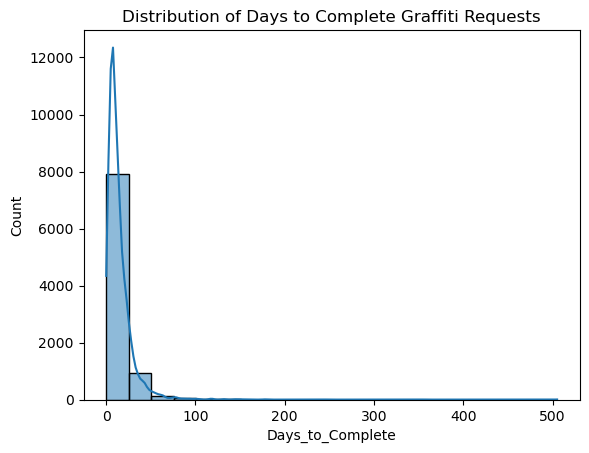

In [144]:
# Visualize distributions
sns.histplot(Reports_ServiceRequest['Days_to_Complete'], kde=True, bins=20)
plt.title('Distribution of Days to Complete Graffiti Requests')
plt.show()

#### Mapping Pedestrian Sensor Locations by Latitude and Longitude

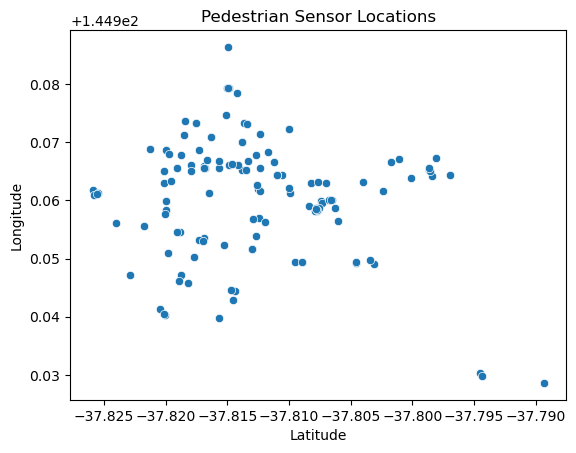

In [146]:
sns.scatterplot(x=Pedestrian_SensorLoc['Latitude'], y=Pedestrian_SensorLoc['Longitude'])
plt.title('Pedestrian Sensor Locations')
plt.show()

#### Graffiti Requests by Year

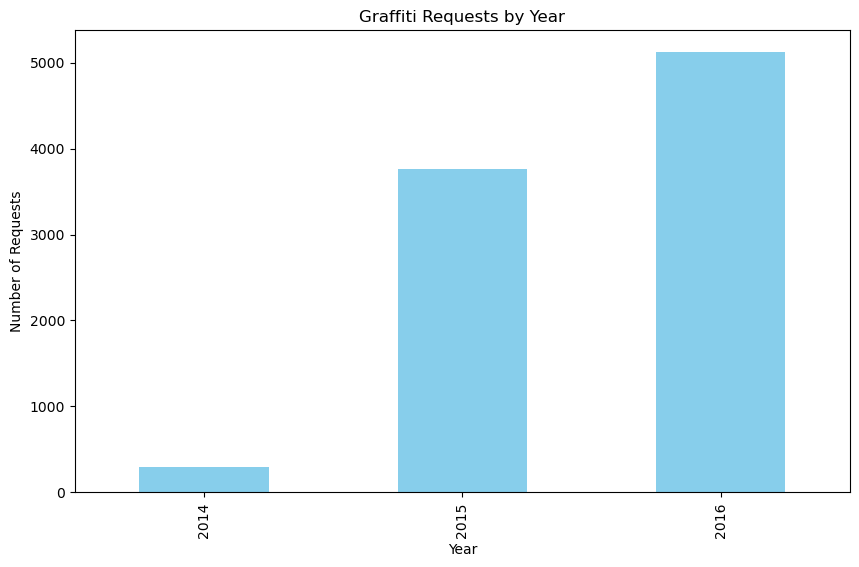

In [148]:
# Number of graffiti requests per year
Reports_ServiceRequest['Year'] = Reports_ServiceRequest['Date_Received'].dt.year
requests_by_year = Reports_ServiceRequest.groupby('Year').size()

requests_by_year.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Graffiti Requests by Year")
plt.xlabel("Year")
plt.ylabel("Number of Requests")
plt.show()
